In [85]:
import os
import numpy as np
import csv
import random
import matplotlib.pyplot as plt

from tslearn.utils import to_time_series_dataset
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
import tslearn.svm as tsvm

In [19]:
'''
use TimeSeriesSVC on fully normalized data overstriding as a test
'''

'\nuse TimeSeriesSVC on fully normalized data overstriding as a test\n'

In [96]:
# helper functions

def series_append(series, list, keys):
    for i in range(64):
        series[keys[i]].append(float(list[i]))
    return series

def load_series(filename):
    with open(filename, 'r') as csv_in:
        csv_file = list(csv.reader(csv_in))
        series = {}
        keys = csv_file[0]
        for key in keys: series[key] = []
        for i in range(2, len(csv_file), 2):
            series = series_append(series, csv_file[i], keys)
        return [series, int((len(csv_file) - 2) / 2)]

def series_to_arr(series):
    l = []
    for key in series:
        if (key[-1] == 'v'): continue
        l += (series[key])
    return l

def E3(pred, truth):
    num_correct = 0
    for i in range(len(pred)):
        if (abs(pred[i] - truth[i]) <= 3):
            num_correct += 1
    return (float(num_correct) / float(len(pred)))

def E2(pred, truth):
    num_correct = 0
    for i in range(len(pred)):
        if (abs(pred[i] - truth[i]) <= 2):
            num_correct += 1
    return (float(num_correct) / float(len(pred)))

def E1(pred, truth):
    num_correct = 0
    for i in range(len(pred)):
        if (abs(pred[i] - truth[i]) <= 1):
            num_correct += 1
    return (float(num_correct) / float(len(pred)))

def E0(pred, truth):
    num_correct = 0
    for i in range(len(pred)):
        if (abs(pred[i] - truth[i]) == 0):
            num_correct += 1
    return (float(num_correct) / float(len(pred)))

In [74]:
# creating svc set

time_normalized_dir = '..\\time_series\\temporally_normalized\\'
time_normalized_files = os.listdir(time_normalized_dir)

X_train = []
y_train = []
label_train = []
X_test = []
y_test = []
label_test = []

for file in time_normalized_files:
    series, num_frames = load_series(time_normalized_dir + file)
    rand = random.randint(0, 100)
    if (rand < 95):
        X_train.append(series_to_arr(series))
        label = int(file[4])
        label_train.append(label)
        if (label < 3):
            y_train.append('0')
        else:
            y_train.append('1')
    elif(rand >= 95):
        X_test.append(series_to_arr(series))
        label = int(file[4])
        label_test.append(label)
        if (label < 3):
            y_test.append('0')
        else:
            y_test.append('1')



print(len(y_train))
print(len(y_test))

X_train = to_time_series_dataset(X_train)
X_test = to_time_series_dataset(X_test)

437
27


In [58]:
# training svm

clf = tsvm.TimeSeriesSVC(kernel="gak", gamma="auto")
clf.fit(X_train, y_train)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

TimeSeriesSVC()

In [ ]:
# testing

print(clf.predict(X_test))
print(y_test)
print('\n\n')

In [84]:
# training knn

knn = KNeighborsTimeSeriesClassifier(n_neighbors=1)
knn.fit(X_train, label_train)

KNeighborsTimeSeriesClassifier(n_neighbors=1)

[3 3 1 0 6 0 7 5 2 1 1 3 0 3 0 0 1 2 1 3 1 7 2 1 2 4 2]
[0, 0, 3, 3, 4, 5, 6, 8, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 4, 4, 5, 6, 7]
E0: 0.037037037037037035
E1: 0.37037037037037035
E2: 0.6666666666666666
E3: 0.9259259259259259


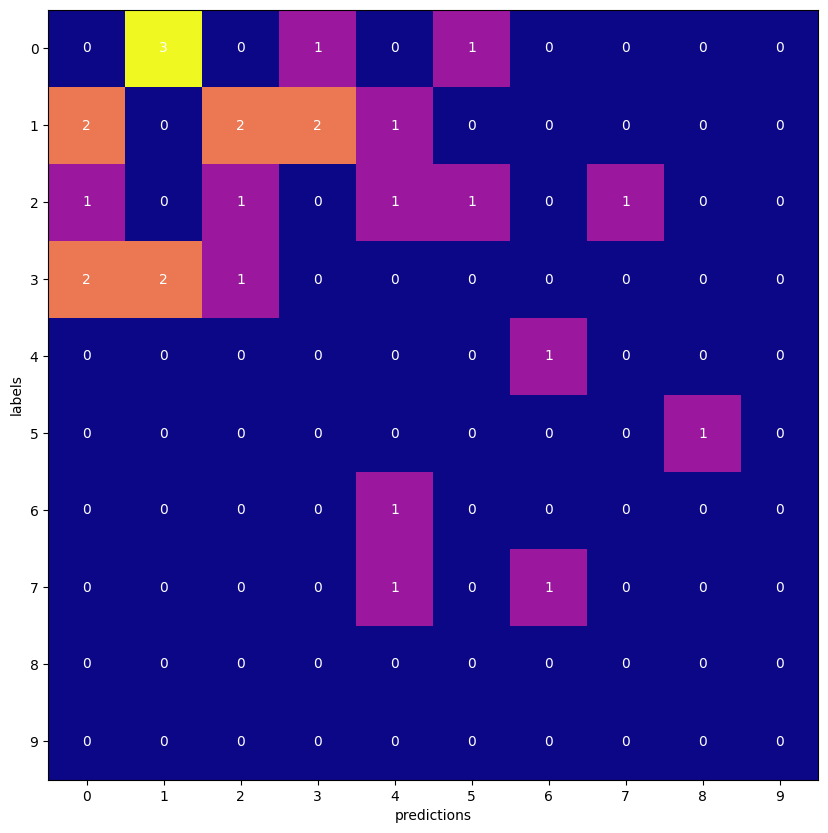

In [97]:
# testing knn

predictions = knn.predict(X_test)
print(predictions)
print(label_test)

confusion = np.zeros((10, 10), dtype=int)

for i in range(len(label_test)):
    confusion[predictions[i]][label_test[i]] += 1

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(confusion, cmap='plasma')
ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 10))
ax.set_xlabel('predictions')
ax.set_ylabel('labels')

for i in range(10):
    for j in range(10):
        text = ax.text(j, i, confusion[i, j], ha="center", va="center", color="white")

print('E0: ' + str(E0(predictions, label_test)))
print('E1: ' + str(E1(predictions, label_test)))
print('E2: ' + str(E2(predictions, label_test)))
print('E3: ' + str(E3(predictions, label_test)))